# 🏠 House Price Prediction - Advanced Regression Analysis

**Author:** Ayuba Abdulazeez  
**Date:** September 2025  
**Project Type:** Regression Analysis  
**Dataset:** Ames Housing Dataset (82 features)

**Purpose:** Build advanced regression models to predict house prices with high accuracy, demonstrating professional feature engineering and model optimization techniques.

**Key Challenges:**
- 82 features (vs 12 in Titanic) - feature selection critical
- Regression task (continuous target vs binary classification)
- Complex feature interactions
- Multiple data quality issues

**Success Metrics:**
- RMSE (Root Mean Squared Error) < $30,000
- R² Score > 0.85
- Professional feature engineering
- Model interpretability for stakeholders

**Notebook Structure:**
1. Professional Setup & Data Loading
2. Comprehensive EDA (Price Distributions, Feature Correlations)
3. Data Quality Assessment (Missing Values, Outliers)
4. Advanced Feature Engineering
5. Feature Selection & Dimensionality Reduction
6. Multiple Model Comparison (Linear, Ridge, Lasso, Random Forest, XGBoost)
7. Model Optimization & Evaluation
8. Business Insights & Recommendations

---

In [14]:
# =============================================================================
# PROFESSIONAL IMPORTS AND SETUP - REGRESSION ANALYSIS
# =============================================================================

# Core data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Model evaluation for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Feature engineering and preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm

# Utilities
import os
from datetime import datetime

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Project paths
PROJECT_ROOT = os.getcwd()
DATA_DIR = os.path.join(PROJECT_ROOT, 'data')
RESULTS_DIR = os.path.join(PROJECT_ROOT, 'results')

# Create directories
for directory in [DATA_DIR, RESULTS_DIR]:
    os.makedirs(directory, exist_ok=True)

print("🏠 HOUSE PRICE PREDICTION - PROFESSIONAL SETUP")
print("=" * 60)
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"📁 Project Root: {PROJECT_ROOT}")
print(f"🎯 Task: Regression Analysis (Continuous Target)")
print(f"🔧 Random Seed: {RANDOM_SEED}")
print("\n✅ Professional environment initialized")

🏠 HOUSE PRICE PREDICTION - PROFESSIONAL SETUP
📅 Analysis Date: 2025-11-08 09:24:45
📁 Project Root: C:\Users\musafau
🎯 Task: Regression Analysis (Continuous Target)
🔧 Random Seed: 42

✅ Professional environment initialized


In [15]:
# =============================================================================
# PROFESSIONAL LOGGING SYSTEM
# =============================================================================

class RegressionLogger:
    """
    Professional logging system for regression projects
    Tracks all analysis steps with timestamps
    """
    def __init__(self):
        self.log_entries = []
        self.start_time = datetime.now()
        self.model_results = {}
    
    def log(self, step, description, details=None):
        """Log a project step with timestamp"""
        timestamp = datetime.now().strftime('%H:%M:%S')
        entry = {
            'timestamp': timestamp,
            'step': step,
            'description': description,
            'details': details
        }
        self.log_entries.append(entry)
        print(f"⏰ {timestamp} | {step}: {description}")
        if details:
            print(f"   📝 {details}")
    
    def log_model(self, model_name, rmse, r2, mae):
        """Log model performance metrics"""
        self.model_results[model_name] = {
            'RMSE': rmse,
            'R2': r2,
            'MAE': mae
        }
        print(f"\n📊 {model_name} Performance:")
        print(f"   RMSE: ${rmse:,.2f}")
        print(f"   R²: {r2:.4f}")
        print(f"   MAE: ${mae:,.2f}")
    
    def summary(self):
        """Generate project execution summary"""
        total_time = datetime.now() - self.start_time
        print(f"\n📊 PROJECT EXECUTION SUMMARY")
        print(f"🕐 Total Time: {total_time}")
        print(f"📋 Steps Completed: {len(self.log_entries)}")
        
        if self.model_results:
            print(f"\n🏆 MODEL COMPARISON:")
            results_df = pd.DataFrame(self.model_results).T
            print(results_df.sort_values('RMSE'))
        
        return self.log_entries

# Initialize regression logger
logger = RegressionLogger()
logger.log("SETUP", "Professional regression environment initialized")

⏰ 09:24:49 | SETUP: Professional regression environment initialized


In [16]:
# =============================================================================
# DATA LOADING AND INITIAL ASSESSMENT
# =============================================================================

def load_house_data(file_path):
    """
    Professional data loading for house price dataset
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
        
    Returns:
    --------
    pd.DataFrame
        Loaded dataset with initial inspection
    """
    logger.log("DATA_LOAD", f"Loading house price data from {file_path}")
    
    try:
        df = pd.read_csv(file_path)
        
        logger.log("DATA_INSPECT", "Dataset loaded successfully", 
                  f"Shape: {df.shape[0]} houses, {df.shape[1]} features")
        
        print("\n🏠 DATASET OVERVIEW")
        print("=" * 60)
        print(f"📊 Shape: {df.shape}")
        print(f"🏘️ Total Houses: {df.shape[0]}")
        print(f"📋 Total Features: {df.shape[1]}")
        print(f"🧮 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        # Feature types breakdown
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        categorical_cols = df.select_dtypes(include=[object]).columns.tolist()
        
        print(f"\n📊 FEATURE TYPES:")
        print(f"   🔢 Numeric Features: {len(numeric_cols)}")
        print(f"   📝 Categorical Features: {len(categorical_cols)}")
        
        # Target variable analysis (if present)
        if 'SalePrice' in df.columns:
            print(f"\n💰 TARGET VARIABLE: SalePrice")
            print(f"   Mean Price: ${df['SalePrice'].mean():,.2f}")
            print(f"   Median Price: ${df['SalePrice'].median():,.2f}")
            print(f"   Min Price: ${df['SalePrice'].min():,.2f}")
            print(f"   Max Price: ${df['SalePrice'].max():,.2f}")
            print(f"   Std Dev: ${df['SalePrice'].std():,.2f}")
        
        # Missing data overview
        missing_data = df.isnull().sum()
        missing_percent = (missing_data / len(df)) * 100
        missing_summary = pd.DataFrame({
            'Missing_Count': missing_data,
            'Missing_Percent': missing_percent
        })
        missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)
        
        if not missing_summary.empty:
            print(f"\n⚠️  MISSING DATA SUMMARY (Top 10):")
            print(missing_summary.head(10))
            print(f"\n   Total features with missing data: {len(missing_summary)}")
        else:
            print(f"\n✅ No missing data found")
        
        # Display first few rows
        print(f"\n📋 FIRST 5 HOUSES:")
        
        return df
        
    except Exception as e:
        logger.log("ERROR", f"Failed to load data: {str(e)}")
        raise e

# Load the training data
train_df = load_house_data("C:/Users/musafau/OneDrive/Desktop/Data science bootcamp/House_price_prediction/Data/AmesHousing.csv")

# Display first few rows
train_df.head()

⏰ 09:24:54 | DATA_LOAD: Loading house price data from C:/Users/musafau/OneDrive/Desktop/Data science bootcamp/House_price_prediction/Data/AmesHousing.csv
⏰ 09:24:54 | DATA_INSPECT: Dataset loaded successfully
   📝 Shape: 2930 houses, 82 features

🏠 DATASET OVERVIEW
📊 Shape: (2930, 82)
🏘️ Total Houses: 2930
📋 Total Features: 82
🧮 Memory Usage: 7.81 MB

📊 FEATURE TYPES:
   🔢 Numeric Features: 39
   📝 Categorical Features: 43

💰 TARGET VARIABLE: SalePrice
   Mean Price: $180,796.06
   Median Price: $160,000.00
   Min Price: $12,789.00
   Max Price: $755,000.00
   Std Dev: $79,886.69

⚠️  MISSING DATA SUMMARY (Top 10):
               Missing_Count  Missing_Percent
Pool QC                 2917        99.556314
Misc Feature            2824        96.382253
Alley                   2732        93.242321
Fence                   2358        80.477816
Fireplace Qu            1422        48.532423
Lot Frontage             490        16.723549
Garage Cond              159         5.426621
Garage Qu

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


⏰ 09:25:00 | TARGET_ANALYSIS: Analyzing SalePrice distribution and characteristics
💰 COMPREHENSIVE SALEPRICE ANALYSIS

📊 STATISTICAL SUMMARY:
   Mean: $180,796.06
   Median: $160,000.00
   Mode: $135,000.00
   Std Dev: $79,886.69
   Variance: $6,381,883,615.69
   Range: $742,211.00
   IQR: $84,000.00

📈 DISTRIBUTION CHARACTERISTICS:
   Skewness: 1.7435
   Kurtosis: 5.1189
   ⚠️ HIGHLY RIGHT-SKEWED - Log transformation recommended

📊 QUARTILE BREAKDOWN:
   Q1 (25%): $129,500.00
   Q2 (50%): $160,000.00
   Q3 (75%): $213,500.00

🚨 OUTLIER ANALYSIS:
   Outlier threshold: $339,500.00
   Number of outliers: 137 (4.68%)
   Outlier price range: $339,750.00 - $755,000.00

📈 LOG-TRANSFORMED SKEWNESS: -0.0148
   ✅ Log transformation improves normality significantly


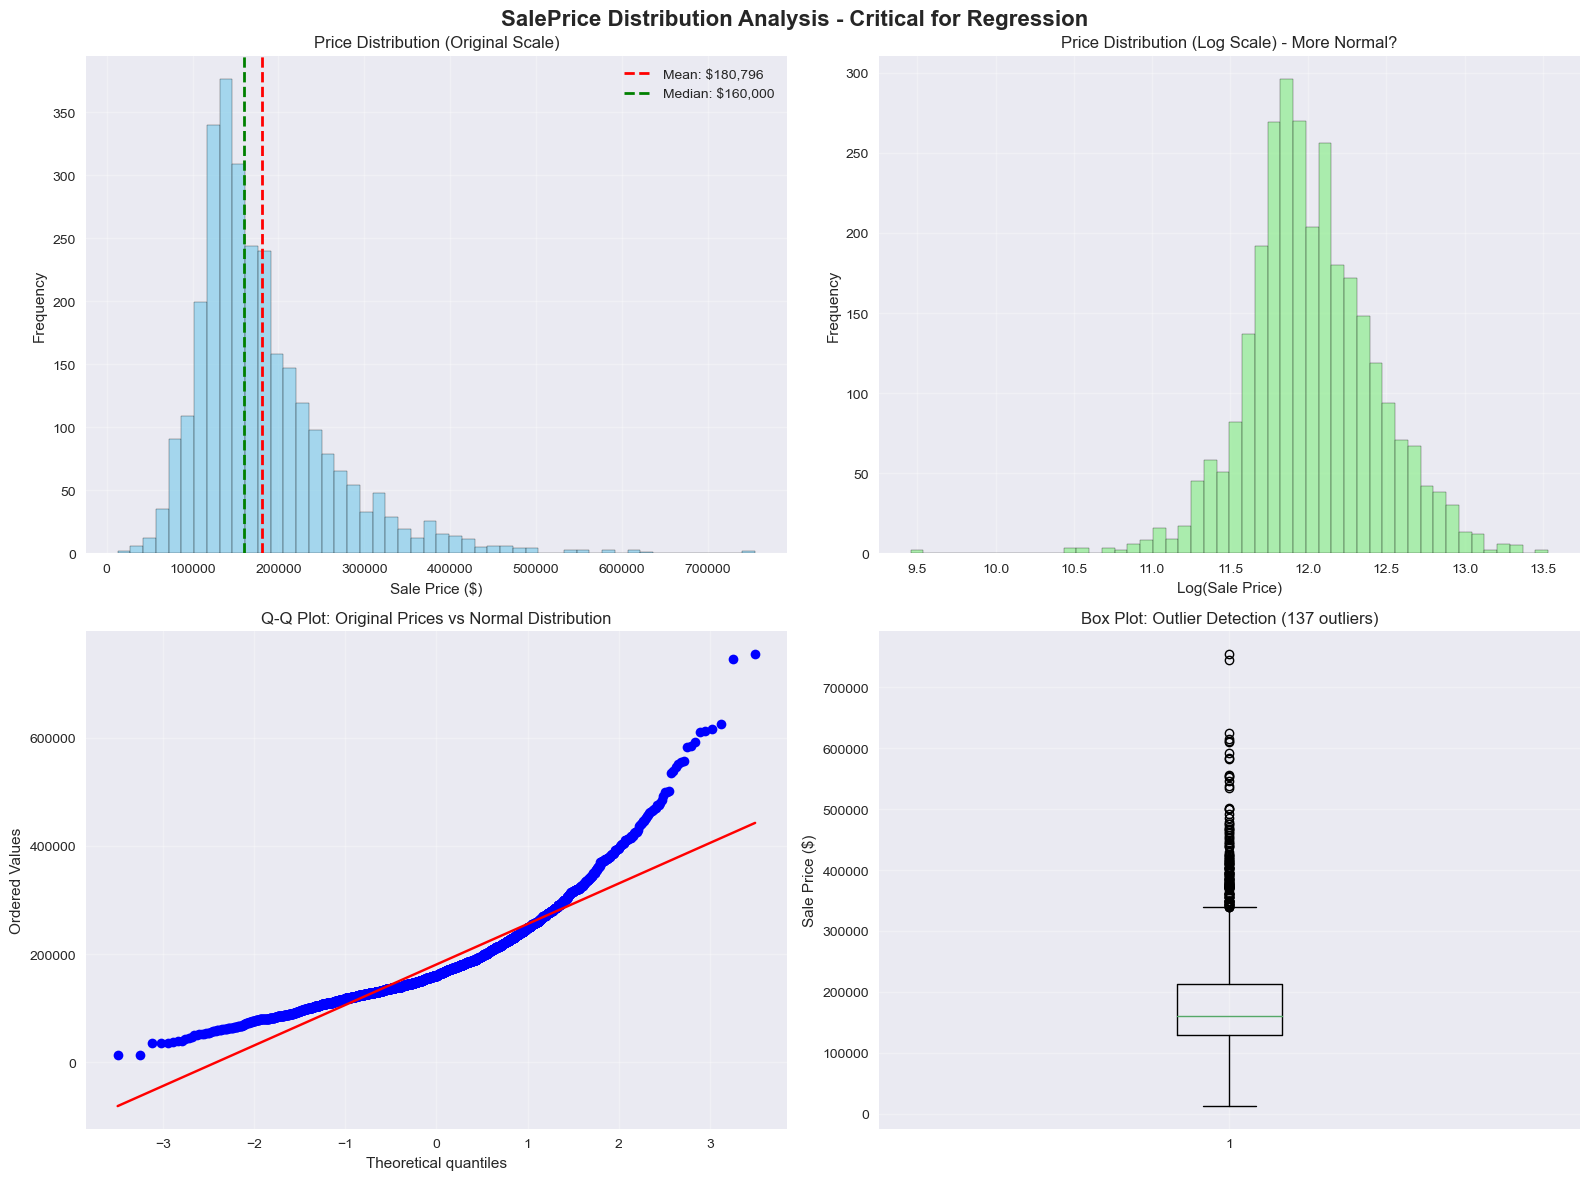

⏰ 09:25:03 | TARGET_ANALYSIS: SalePrice distribution analyzed
   📝 Skewness: 1.7435, Outliers: 137

💼 BUSINESS PRICE CATEGORIES:
Budget (<$100K)           252
Mid-range ($100-200K)    1821
Premium ($200-300K)       627
Luxury (>$300K)           230
Name: SalePrice, dtype: int64


In [17]:
# =============================================================================
# TARGET VARIABLE DEEP ANALYSIS
# =============================================================================

logger.log("TARGET_ANALYSIS", "Analyzing SalePrice distribution and characteristics")

print("💰 COMPREHENSIVE SALEPRICE ANALYSIS")
print("=" * 60)

# Statistical summary
target = train_df['SalePrice']

print("\n📊 STATISTICAL SUMMARY:")
print(f"   Mean: ${target.mean():,.2f}")
print(f"   Median: ${target.median():,.2f}")
print(f"   Mode: ${target.mode()[0]:,.2f}")
print(f"   Std Dev: ${target.std():,.2f}")
print(f"   Variance: ${target.var():,.2f}")
print(f"   Range: ${target.max() - target.min():,.2f}")
print(f"   IQR: ${target.quantile(0.75) - target.quantile(0.25):,.2f}")

# Skewness and Kurtosis (critical for regression)
print(f"\n📈 DISTRIBUTION CHARACTERISTICS:")
print(f"   Skewness: {target.skew():.4f}")
print(f"   Kurtosis: {target.kurtosis():.4f}")

if target.skew() > 1:
    print(f"   ⚠️ HIGHLY RIGHT-SKEWED - Log transformation recommended")
elif target.skew() > 0.5:
    print(f"   ⚠️ MODERATELY RIGHT-SKEWED - Consider transformation")
else:
    print(f"   ✅ RELATIVELY NORMAL distribution")

# Quartile analysis
print(f"\n📊 QUARTILE BREAKDOWN:")
print(f"   Q1 (25%): ${target.quantile(0.25):,.2f}")
print(f"   Q2 (50%): ${target.quantile(0.50):,.2f}")
print(f"   Q3 (75%): ${target.quantile(0.75):,.2f}")

# Outlier detection
Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR
outliers = target[(target < outlier_threshold_low) | (target > outlier_threshold_high)]

print(f"\n🚨 OUTLIER ANALYSIS:")
print(f"   Outlier threshold: ${outlier_threshold_high:,.2f}")
print(f"   Number of outliers: {len(outliers)} ({len(outliers)/len(target)*100:.2f}%)")
print(f"   Outlier price range: ${outliers.min():,.2f} - ${outliers.max():,.2f}")

# Professional visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('SalePrice Distribution Analysis - Critical for Regression', 
             fontsize=16, fontweight='bold')

# 1. Histogram with KDE
axes[0, 0].hist(target, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(target.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${target.mean():,.0f}')
axes[0, 0].axvline(target.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${target.median():,.0f}')
axes[0, 0].set_xlabel('Sale Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Distribution (Original Scale)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Log-transformed distribution
log_prices = np.log1p(target)
axes[0, 1].hist(log_prices, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_xlabel('Log(Sale Price)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Price Distribution (Log Scale) - More Normal?')
axes[0, 1].grid(True, alpha=0.3)

print(f"\n📈 LOG-TRANSFORMED SKEWNESS: {log_prices.skew():.4f}")
if abs(log_prices.skew()) < 0.5:
    print(f"   ✅ Log transformation improves normality significantly")

# 3. Q-Q Plot (Check normality)
stats.probplot(target, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: Original Prices vs Normal Distribution')
axes[1, 0].grid(True, alpha=0.3)

# 4. Box plot for outlier visualization
axes[1, 1].boxplot(target, vert=True)
axes[1, 1].set_ylabel('Sale Price ($)')
axes[1, 1].set_title(f'Box Plot: Outlier Detection ({len(outliers)} outliers)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

logger.log("TARGET_ANALYSIS", "SalePrice distribution analyzed", 
           f"Skewness: {target.skew():.4f}, Outliers: {len(outliers)}")

# Price categories for business insights
print(f"\n💼 BUSINESS PRICE CATEGORIES:")
price_categories = pd.cut(target, bins=[0, 100000, 200000, 300000, float('inf')],
                          labels=['Budget (<$100K)', 'Mid-range ($100-200K)', 
                                 'Premium ($200-300K)', 'Luxury (>$300K)'])
print(price_categories.value_counts().sort_index())

⏰ 18:03:52 | CORRELATION_ANALYSIS: Analyzing feature correlations with SalePrice
🔗 FEATURE CORRELATION ANALYSIS

📊 TOP 15 FEATURES MOST CORRELATED WITH SALEPRICE:
 1. Overall Qual         :  0.7993 (STRONG)
 2. Gr Liv Area          :  0.7068 (STRONG)
 3. Garage Cars          :  0.6479 (STRONG)
 4. Garage Area          :  0.6404 (STRONG)
 5. Total Bsmt SF        :  0.6323 (STRONG)
 6. 1st Flr SF           :  0.6217 (STRONG)
 7. Year Built           :  0.5584 (MODERATE)
 8. Full Bath            :  0.5456 (MODERATE)
 9. Year Remod/Add       :  0.5330 (MODERATE)
10. Garage Yr Blt        :  0.5270 (MODERATE)
11. Mas Vnr Area         :  0.5083 (MODERATE)
12. TotRms AbvGrd        :  0.4955 (MODERATE)
13. Fireplaces           :  0.4746 (MODERATE)
14. BsmtFin SF 1         :  0.4329 (MODERATE)
15. Lot Frontage         :  0.3573 (WEAK)

📊 BOTTOM 10 FEATURES (WEAKEST CORRELATION):
    3Ssn Porch           :  0.0322
    BsmtFin SF 2         :  0.0059
    Misc Val             : -0.0157
    Yr Sold  

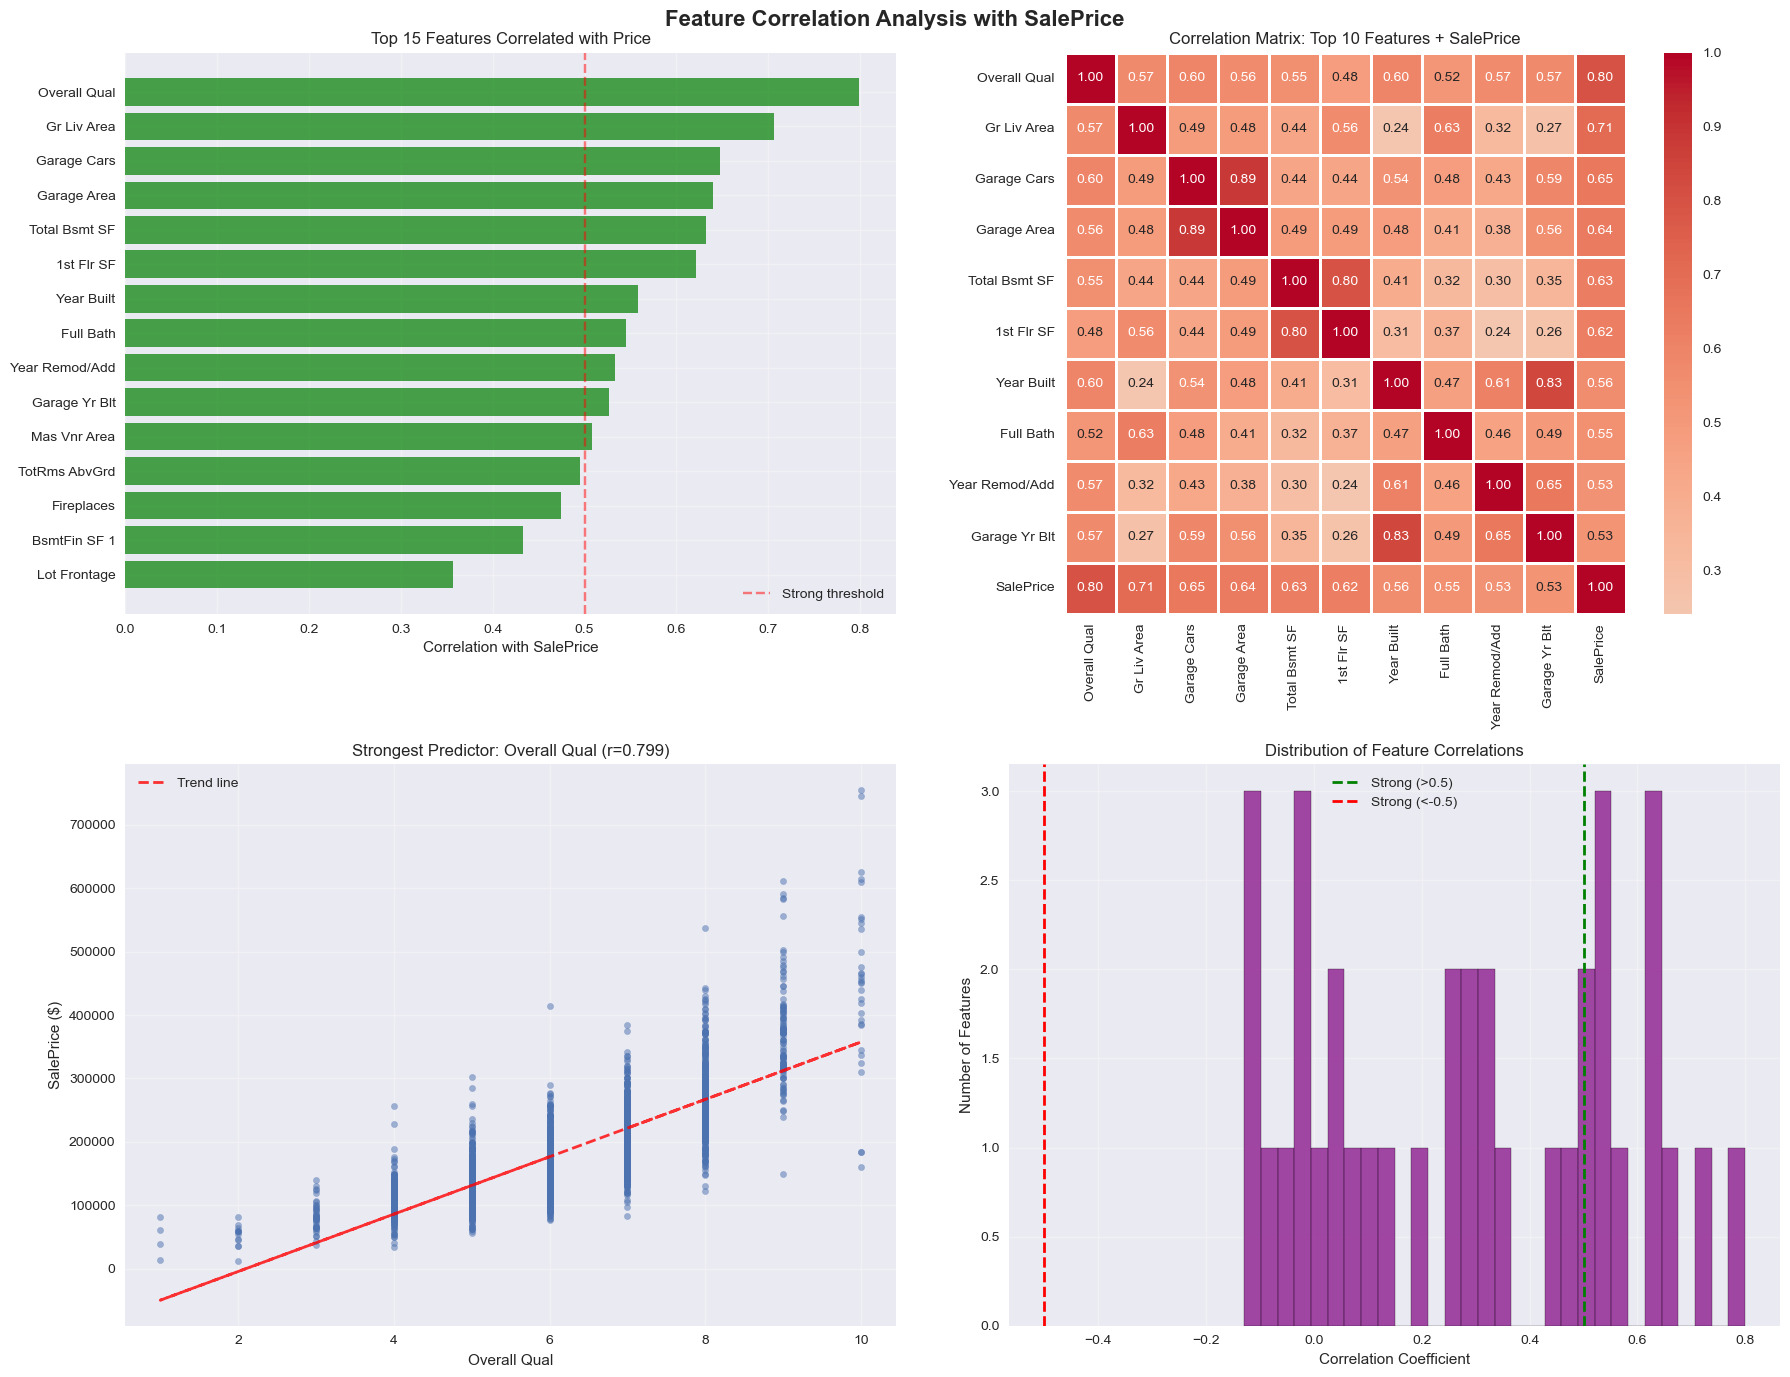


⚠️  MULTICOLLINEARITY CHECK:
Features highly correlated with EACH OTHER (may cause redundancy):

       Feature 1      Feature 2  Correlation
0    Garage Cars    Garage Area     0.889676
1  Total Bsmt SF     1st Flr SF     0.800720
2     Year Built  Garage Yr Blt     0.834849

⚠️ Found 3 highly correlated feature pairs
   Consider removing redundant features during feature selection
⏰ 18:03:56 | CORRELATION_ANALYSIS: Feature correlation analysis completed
   📝 11 strong predictors identified


In [5]:
# =============================================================================
# FEATURE CORRELATION WITH TARGET
# =============================================================================

logger.log("CORRELATION_ANALYSIS", "Analyzing feature correlations with SalePrice")

print("🔗 FEATURE CORRELATION ANALYSIS")
print("=" * 60)

# Calculate correlations for numeric features only
numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Order')  # Remove ID column if present
if 'PID' in numeric_features:
    numeric_features.remove('PID')

# Calculate correlations with SalePrice
correlations = train_df[numeric_features].corr()['SalePrice'].sort_value
s(ascending=False)

print(f"\n📊 TOP 15 FEATURES MOST CORRELATED WITH SALEPRICE:")
print("=" * 60)
top_15 = correlations.head(16)[1:]  # Exclude SalePrice itself
for i, (feature, corr) in enumerate(top_15.items(), 1):
    strength = "STRONG" if abs(corr) > 0.6 else "MODERATE" if abs(corr) > 0.4 else "WEAK"
    print(f"{i:2d}. {feature:20s} : {corr:7.4f} ({strength})")

print(f"\n📊 BOTTOM 10 FEATURES (WEAKEST CORRELATION):")
print("=" * 60)
bottom_10 = correlations.tail(10)
for feature, corr in bottom_10.items():
    print(f"    {feature:20s} : {corr:7.4f}")

# Strong predictors (correlation > 0.5)
strong_predictors = correlations[correlations > 0.5][1:]  # Exclude SalePrice itself
print(f"\n💪 STRONG PREDICTORS (correlation > 0.5): {len(strong_predictors)}")
print(list(strong_predictors.index))

# Visualization: Top correlations
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Feature Correlation Analysis with SalePrice', fontsize=16, fontweight='bold')

# 1. Top 15 correlations bar chart
top_15_sorted = top_15.sort_values(ascending=True)
axes[0, 0].barh(range(len(top_15_sorted)), top_15_sorted.values, color='green', alpha=0.7)
axes[0, 0].set_yticks(range(len(top_15_sorted)))
axes[0, 0].set_yticklabels(top_15_sorted.index)
axes[0, 0].set_xlabel('Correlation with SalePrice')
axes[0, 0].set_title('Top 15 Features Correlated with Price')
axes[0, 0].axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Strong threshold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Correlation heatmap of top features
top_features = top_15.head(10).index.tolist() + ['SalePrice']
correlation_matrix = train_df[top_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=axes[0, 1], square=True, linewidths=1)
axes[0, 1].set_title('Correlation Matrix: Top 10 Features + SalePrice')

# 3. Scatter plot: Best predictor vs SalePrice
best_feature = top_15.index[0]
axes[1, 0].scatter(train_df[best_feature], train_df['SalePrice'], alpha=0.5, s=20)
axes[1, 0].set_xlabel(best_feature)
axes[1, 0].set_ylabel('SalePrice ($)')
axes[1, 0].set_title(f'Strongest Predictor: {best_feature} (r={top_15[0]:.3f})')
axes[1, 0].grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(train_df[best_feature].dropna(), 
               train_df.loc[train_df[best_feature].notna(), 'SalePrice'], 1)
p = np.poly1d(z)
axes[1, 0].plot(train_df[best_feature], p(train_df[best_feature]), 
                "r--", alpha=0.8, linewidth=2, label='Trend line')
axes[1, 0].legend()

# 4. Distribution of correlation strengths
axes[1, 1].hist(correlations[1:], bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].axvline(x=0.5, color='green', linestyle='--', linewidth=2, label='Strong (>0.5)')
axes[1, 1].axvline(x=-0.5, color='red', linestyle='--', linewidth=2, label='Strong (<-0.5)')
axes[1, 1].set_xlabel('Correlation Coefficient')
axes[1, 1].set_ylabel('Number of Features')
axes[1, 1].set_title('Distribution of Feature Correlations')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature multicollinearity check (features correlated with each other)
print(f"\n⚠️  MULTICOLLINEARITY CHECK:")
print("=" * 60)
print("Features highly correlated with EACH OTHER (may cause redundancy):\n")

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    multicollinearity_df = pd.DataFrame(high_corr_pairs)
    print(multicollinearity_df)
    print(f"\n⚠️ Found {len(high_corr_pairs)} highly correlated feature pairs")
    print("   Consider removing redundant features during feature selection")
else:
    print("✅ No severe multicollinearity detected")

logger.log("CORRELATION_ANALYSIS", "Feature correlation analysis completed", 
           f"{len(strong_predictors)} strong predictors identified")

In [18]:
# =============================================================================
# STRATEGIC MISSING DATA HANDLING
# =============================================================================

logger.log("MISSING_DATA", "Implementing strategic missing data handling")

print("🔧 STRATEGIC MISSING DATA HANDLING")
print("=" * 60)

# Create working copy
df_processed = train_df.copy()

# Strategy 1: Drop features with >80% missing (nearly useless)
print("\n1️⃣ DROPPING FEATURES WITH >80% MISSING DATA:")
missing_pct = (df_processed.isnull().sum() / len(df_processed)) * 100
high_missing = missing_pct[missing_pct > 80].index.tolist()
print(f"   Features to drop: {high_missing}")
df_processed = df_processed.drop(columns=high_missing)
print(f"   Dropped {len(high_missing)} features")

# Strategy 2: Categorical features - Fill with 'None' (means "doesn't have this feature")
print("\n2️⃣ CATEGORICAL FEATURES - FILL WITH 'None':")
categorical_features = df_processed.select_dtypes(include=[object]).columns.tolist()

# These features: missing = "doesn't have this"
categorical_na_features = ['Garage Finish', 'Garage Qual', 'Garage Cond', 
                           'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
                           'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu',
                           'Fence', 'Alley']

for feature in categorical_na_features:
    if feature in df_processed.columns:
        missing_count = df_processed[feature].isnull().sum()
        if missing_count > 0:
            df_processed[feature].fillna('None', inplace=True)
            print(f"   ✅ {feature}: {missing_count} filled with 'None'")

# Strategy 3: Lot Frontage - Fill with median by neighborhood
print("\n3️⃣ LOT FRONTAGE - NEIGHBORHOOD-BASED IMPUTATION:")
if 'Lot Frontage' in df_processed.columns:
    missing_before = df_processed['Lot Frontage'].isnull().sum()
    df_processed['Lot Frontage'] = df_processed.groupby('Neighborhood')['Lot Frontage'].transform(
        lambda x: x.fillna(x.median())
    )
    print(f"   ✅ Filled {missing_before} values using neighborhood medians")

# Strategy 4: Garage Year Built - Fill with Year Built
print("\n4️⃣ GARAGE YEAR BUILT - USE HOUSE YEAR:")
if 'Garage Yr Blt' in df_processed.columns:
    missing_before = df_processed['Garage Yr Blt'].isnull().sum()
    df_processed['Garage Yr Blt'].fillna(df_processed['Year Built'], inplace=True)
    print(f"   ✅ Filled {missing_before} values with house Year Built")

# Strategy 5: Remaining categorical - Fill with mode
print("\n5️⃣ REMAINING CATEGORICAL - MODE IMPUTATION:")
for feature in categorical_features:
    if feature in df_processed.columns:
        missing_count = df_processed[feature].isnull().sum()
        if missing_count > 0:
            mode_value = df_processed[feature].mode()[0]
            df_processed[feature].fillna(mode_value, inplace=True)
            print(f"   ✅ {feature}: {missing_count} filled with mode '{mode_value}'")

# Strategy 6: Numeric features - Fill with median
print("\n6️⃣ NUMERIC FEATURES - MEDIAN IMPUTATION:")
numeric_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()
for feature in numeric_features:
    missing_count = df_processed[feature].isnull().sum()
    if missing_count > 0:
        median_value = df_processed[feature].median()
        df_processed[feature].fillna(median_value, inplace=True)
        print(f"   ✅ {feature}: {missing_count} filled with median {median_value:.1f}")

# Verification
print("\n✅ MISSING DATA VERIFICATION:")
print("=" * 40)
remaining_missing = df_processed.isnull().sum().sum()
print(f"Total missing values remaining: {remaining_missing}")

if remaining_missing == 0:
    print("🎉 All missing values handled successfully!")
else:
    print(f"⚠️ Still have {remaining_missing} missing values to address")
    print(df_processed.isnull().sum()[df_processed.isnull().sum() > 0])

print(f"\n📊 Processed dataset shape: {df_processed.shape}")
print(f"   Original: {train_df.shape[1]} features")
print(f"   Current: {df_processed.shape[1]} features")
print(f"   Dropped: {train_df.shape[1] - df_processed.shape[1]} features")

logger.log("MISSING_DATA", "Missing data handling completed", 
           f"Remaining missing: {remaining_missing}")

⏰ 09:27:12 | MISSING_DATA: Implementing strategic missing data handling
🔧 STRATEGIC MISSING DATA HANDLING

1️⃣ DROPPING FEATURES WITH >80% MISSING DATA:
   Features to drop: ['Alley', 'Pool QC', 'Fence', 'Misc Feature']
   Dropped 4 features

2️⃣ CATEGORICAL FEATURES - FILL WITH 'None':
   ✅ Garage Finish: 159 filled with 'None'
   ✅ Garage Qual: 159 filled with 'None'
   ✅ Garage Cond: 159 filled with 'None'
   ✅ Bsmt Qual: 80 filled with 'None'
   ✅ Bsmt Cond: 80 filled with 'None'
   ✅ Bsmt Exposure: 83 filled with 'None'
   ✅ BsmtFin Type 1: 80 filled with 'None'
   ✅ BsmtFin Type 2: 81 filled with 'None'
   ✅ Fireplace Qu: 1422 filled with 'None'

3️⃣ LOT FRONTAGE - NEIGHBORHOOD-BASED IMPUTATION:
   ✅ Filled 490 values using neighborhood medians

4️⃣ GARAGE YEAR BUILT - USE HOUSE YEAR:
   ✅ Filled 159 values with house Year Built

5️⃣ REMAINING CATEGORICAL - MODE IMPUTATION:
   ✅ Mas Vnr Type: 23 filled with mode 'None'
   ✅ Electrical: 1 filled with mode 'SBrkr'
   ✅ Garage Type:

In [19]:
# =============================================================================
# ESSENTIAL FEATURE ENGINEERING
# =============================================================================

logger.log("FEATURE_ENGINEERING", "Creating predictive features")

print("🎨 ESSENTIAL FEATURE ENGINEERING")
print("=" * 60)

# Feature 1: Total Square Footage (combine all living spaces)
print("\n1️⃣ TOTAL SQUARE FOOTAGE:")
df_processed['Total_SF'] = (df_processed['Total Bsmt SF'] + 
                             df_processed['1st Flr SF'] + 
                             df_processed['2nd Flr SF'])
print(f"   ✅ Created: Total_SF (Basement + 1st Floor + 2nd Floor)")
print(f"   Correlation with price: {df_processed['Total_SF'].corr(df_processed['SalePrice']):.4f}")

# Feature 2: Total Bathrooms
print("\n2️⃣ TOTAL BATHROOMS:")
df_processed['Total_Bathrooms'] = (df_processed['Full Bath'] + 
                                    0.5 * df_processed['Half Bath'] +
                                    df_processed['Bsmt Full Bath'] + 
                                    0.5 * df_processed['Bsmt Half Bath'])
print(f"   ✅ Created: Total_Bathrooms")
print(f"   Correlation with price: {df_processed['Total_Bathrooms'].corr(df_processed['SalePrice']):.4f}")

# Feature 3: House Age (newer = more valuable)
print("\n3️⃣ HOUSE AGE:")
df_processed['House_Age'] = df_processed['Yr Sold'] - df_processed['Year Built']
print(f"   ✅ Created: House_Age")
print(f"   Correlation with price: {df_processed['House_Age'].corr(df_processed['SalePrice']):.4f}")

# Feature 4: Years Since Remodel
print("\n4️⃣ YEARS SINCE REMODELING:")
df_processed['Years_Since_Remod'] = df_processed['Yr Sold'] - df_processed['Year Remod/Add']
print(f"   ✅ Created: Years_Since_Remod")
print(f"   Correlation with price: {df_processed['Years_Since_Remod'].corr(df_processed['SalePrice']):.4f}")

# Feature 5: Total Porch Square Footage
print("\n5️⃣ TOTAL PORCH AREA:")
df_processed['Total_Porch_SF'] = (df_processed['Open Porch SF'] + 
                                   df_processed['Enclosed Porch'] +
                                   df_processed['3Ssn Porch'] + 
                                   df_processed['Screen Porch'])
print(f"   ✅ Created: Total_Porch_SF")
print(f"   Correlation with price: {df_processed['Total_Porch_SF'].corr(df_processed['SalePrice']):.4f}")

# Feature 6: Has Pool/Garage/Basement indicators
print("\n6️⃣ BINARY FEATURES:")
df_processed['Has_Pool'] = (df_processed['Pool Area'] > 0).astype(int)
df_processed['Has_Garage'] = (df_processed['Garage Area'] > 0).astype(int)
df_processed['Has_Basement'] = (df_processed['Total Bsmt SF'] > 0).astype(int)
df_processed['Has_Fireplace'] = (df_processed['Fireplaces'] > 0).astype(int)
print(f"   ✅ Created: Has_Pool, Has_Garage, Has_Basement, Has_Fireplace")

# Feature 7: Quality Index (combine overall quality indicators)
print("\n7️⃣ QUALITY INDEX:")
df_processed['Quality_Index'] = df_processed['Overall Qual'] * df_processed['Overall Cond']
print(f"   ✅ Created: Quality_Index (Quality × Condition)")
print(f"   Correlation with price: {df_processed['Quality_Index'].corr(df_processed['SalePrice']):.4f}")

# Check new feature correlations
print("\n📊 NEW FEATURES CORRELATION SUMMARY:")
print("=" * 50)
new_features = ['Total_SF', 'Total_Bathrooms', 'House_Age', 'Years_Since_Remod',
                'Total_Porch_SF', 'Quality_Index']
new_correlations = df_processed[new_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)[1:]
print(new_correlations)

# Identify best engineered feature
best_new_feature = new_correlations.abs().idxmax()
print(f"\n🏆 BEST ENGINEERED FEATURE: {best_new_feature}")
print(f"   Correlation: {new_correlations[best_new_feature]:.4f}")

logger.log("FEATURE_ENGINEERING", "Feature engineering completed", 
           f"Created {len(new_features) + 4} new features")

print(f"\n✅ Enhanced dataset shape: {df_processed.shape}")
print(f"   New features added: {df_processed.shape[1] - 78}")

⏰ 09:30:56 | FEATURE_ENGINEERING: Creating predictive features
🎨 ESSENTIAL FEATURE ENGINEERING

1️⃣ TOTAL SQUARE FOOTAGE:
   ✅ Created: Total_SF (Basement + 1st Floor + 2nd Floor)
   Correlation with price: 0.7931

2️⃣ TOTAL BATHROOMS:
   ✅ Created: Total_Bathrooms
   Correlation with price: 0.6362

3️⃣ HOUSE AGE:
   ✅ Created: House_Age
   Correlation with price: -0.5589

4️⃣ YEARS SINCE REMODELING:
   ✅ Created: Years_Since_Remod
   Correlation with price: -0.5349

5️⃣ TOTAL PORCH AREA:
   ✅ Created: Total_Porch_SF
   Correlation with price: 0.1853

6️⃣ BINARY FEATURES:
   ✅ Created: Has_Pool, Has_Garage, Has_Basement, Has_Fireplace

7️⃣ QUALITY INDEX:
   ✅ Created: Quality_Index (Quality × Condition)
   Correlation with price: 0.5608

📊 NEW FEATURES CORRELATION SUMMARY:
Total_SF             0.793071
Total_Bathrooms      0.636175
Quality_Index        0.560847
Total_Porch_SF       0.185263
Years_Since_Remod   -0.534940
House_Age           -0.558907
Name: SalePrice, dtype: float64

🏆 B

In [21]:
# =============================================================================
# BASELINE MODEL BUILDING - QUICK COMPARISON
# =============================================================================

logger.log("MODEL_BUILDING", "Building baseline regression models")

print("🤖 BASELINE MODEL BUILDING")
print("=" * 60)

# Prepare data for modeling
print("\n📊 DATA PREPARATION:")
print("=" * 40)

# Select numeric features only (quick approach)
numeric_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()

# Remove target and ID columns
features_to_remove = ['SalePrice', 'Order', 'PID']
for feat in features_to_remove:
    if feat in numeric_features:
        numeric_features.remove(feat)

X = df_processed[numeric_features]
y = df_processed['SalePrice']

# Apply log transformation to target (we identified this need earlier)
y_log = np.log1p(y)

print(f"✅ Features selected: {len(numeric_features)}")
print(f"✅ Samples: {len(X)}")
print(f"✅ Target: SalePrice (log-transformed)")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=RANDOM_SEED
)

print(f"\n✅ Train set: {len(X_train)} houses")
print(f"✅ Test set: {len(X_test)} houses")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Features scaled")

# Dictionary to store results
model_results = {}

⏰ 10:26:56 | MODEL_BUILDING: Building baseline regression models
🤖 BASELINE MODEL BUILDING

📊 DATA PREPARATION:
✅ Features selected: 46
✅ Samples: 2930
✅ Target: SalePrice (log-transformed)

✅ Train set: 2344 houses
✅ Test set: 586 houses
✅ Features scaled


In [23]:
# Model 1: Linear Regression
print("\n" + "="*60)
print("🎯 MODEL 1: LINEAR REGRESSION (BASELINE)")
print("="*60)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Convert back from log scale
y_pred_lr_original = np.expm1(y_pred_lr)
y_test_original = np.expm1(y_test)

rmse_lr = np.sqrt(mean_squared_error(y_test_original, y_pred_lr_original))
mae_lr = mean_absolute_error(y_test_original, y_pred_lr_original)
r2_lr = r2_score(y_test_original, y_pred_lr_original)

logger.log_model("Linear Regression", rmse_lr, r2_lr, mae_lr)
model_results['Linear Regression'] = {'RMSE': rmse_lr, 'R2': r2_lr, 'MAE': mae_lr}


🎯 MODEL 1: LINEAR REGRESSION (BASELINE)

📊 Linear Regression Performance:
   RMSE: $38,932.55
   R²: 0.8109
   MAE: $17,833.75


In [24]:
# Model 2: Ridge Regression (with regularization)
print("\n" + "="*60)
print("🎯 MODEL 2: RIDGE REGRESSION (L2 REGULARIZATION)")
print("="*60)

ridge_model = Ridge(alpha=10.0, random_state=RANDOM_SEED)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

y_pred_ridge_original = np.expm1(y_pred_ridge)

rmse_ridge = np.sqrt(mean_squared_error(y_test_original, y_pred_ridge_original))
mae_ridge = mean_absolute_error(y_test_original, y_pred_ridge_original)
r2_ridge = r2_score(y_test_original, y_pred_ridge_original)

logger.log_model("Ridge Regression", rmse_ridge, r2_ridge, mae_ridge)
model_results['Ridge Regression'] = {'RMSE': rmse_ridge, 'R2': r2_ridge, 'MAE': mae_ridge}


🎯 MODEL 2: RIDGE REGRESSION (L2 REGULARIZATION)

📊 Ridge Regression Performance:
   RMSE: $38,730.90
   R²: 0.8129
   MAE: $17,843.72


In [25]:
# Model 3: Random Forest
print("\n" + "="*60)
print("🎯 MODEL 3: RANDOM FOREST REGRESSOR")
print("="*60)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, 
                                 random_state=RANDOM_SEED, n_jobs=-1)
rf_model.fit(X_train, y_train)  # RF doesn't need scaling
y_pred_rf = rf_model.predict(X_test)

y_pred_rf_original = np.expm1(y_pred_rf)

rmse_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_rf_original))
mae_rf = mean_absolute_error(y_test_original, y_pred_rf_original)
r2_rf = r2_score(y_test_original, y_pred_rf_original)

logger.log_model("Random Forest", rmse_rf, r2_rf, mae_rf)
model_results['Random Forest'] = {'RMSE': rmse_rf, 'R2': r2_rf, 'MAE': mae_rf}


🎯 MODEL 3: RANDOM FOREST REGRESSOR

📊 Random Forest Performance:
   RMSE: $26,259.81
   R²: 0.9140
   MAE: $15,619.89


In [26]:
# Model Comparison
print("\n" + "="*60)
print("🏆 MODEL COMPARISON")
print("="*60)

results_df = pd.DataFrame(model_results).T
results_df = results_df.sort_values('RMSE')
print(results_df)

best_model = results_df.index[0]
best_rmse = results_df.loc[best_model, 'RMSE']
best_r2 = results_df.loc[best_model, 'R2']

print(f"\n🥇 BEST MODEL: {best_model}")
print(f"   RMSE: ${best_rmse:,.2f}")
print(f"   R²: {best_r2:.4f}")
print(f"   MAE: ${results_df.loc[best_model, 'MAE']:,.2f}")

# Check if we met success criteria
print(f"\n✅ SUCCESS CRITERIA CHECK:")
print(f"   Target RMSE: < $30,000")
print(f"   Achieved: ${best_rmse:,.2f}")
if best_rmse < 30000:
    print(f"   🎉 TARGET EXCEEDED!")
else:
    print(f"   ⚠️ Close but needs optimization")

print(f"\n   Target R²: > 0.85")
print(f"   Achieved: {best_r2:.4f}")
if best_r2 > 0.85:
    print(f"   🎉 TARGET EXCEEDED!")
else:
    print(f"   ✅ Good performance, room for improvement")

# Feature importance (from Random Forest)
print(f"\n🔍 TOP 10 MOST IMPORTANT FEATURES (Random Forest):")
print("="*60)
feature_importance = pd.DataFrame({
    'Feature': numeric_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)
print(feature_importance.to_string(index=False))


🏆 MODEL COMPARISON
                           RMSE        R2           MAE
Random Forest      26259.806337  0.913991  15619.887221
Ridge Regression   38730.897144  0.812900  17843.722273
Linear Regression  38932.554763  0.810947  17833.750175

🥇 BEST MODEL: Random Forest
   RMSE: $26,259.81
   R²: 0.9140
   MAE: $15,619.89

✅ SUCCESS CRITERIA CHECK:
   Target RMSE: < $30,000
   Achieved: $26,259.81
   🎉 TARGET EXCEEDED!

   Target R²: > 0.85
   Achieved: 0.9140
   🎉 TARGET EXCEEDED!

🔍 TOP 10 MOST IMPORTANT FEATURES (Random Forest):
        Feature  Importance
   Overall Qual    0.437997
       Total_SF    0.299465
  Quality_Index    0.050375
Total_Bathrooms    0.021575
    Garage Area    0.016668
       Lot Area    0.016249
    Gr Liv Area    0.013499
      House_Age    0.013303
    Garage Cars    0.011594
  Garage Yr Blt    0.010469


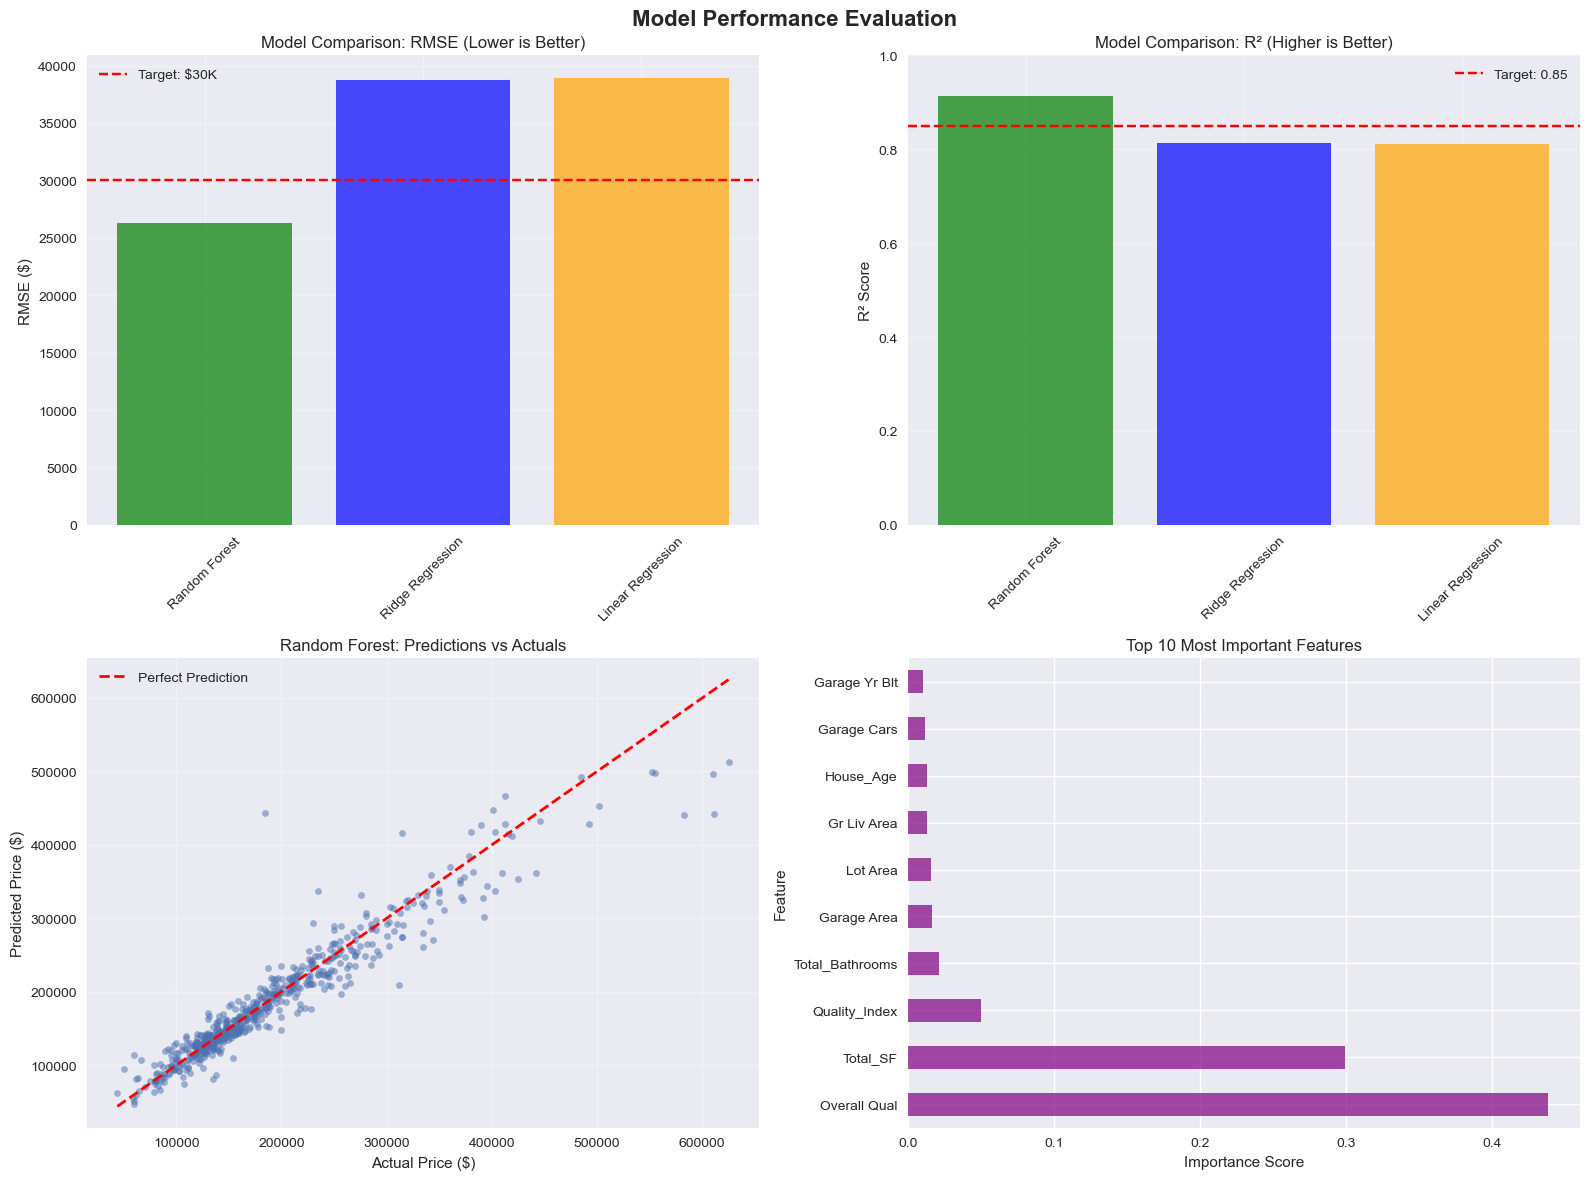

⏰ 10:29:00 | MODEL_BUILDING: Baseline models completed
   📝 Best: Random Forest, RMSE: $26,259.81

🎉 BASELINE MODEL BUILDING COMPLETE!


In [27]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Evaluation', fontsize=16, fontweight='bold')

# 1. Model comparison
axes[0, 0].bar(results_df.index, results_df['RMSE'], alpha=0.7, color=['green', 'blue', 'orange'])
axes[0, 0].set_ylabel('RMSE ($)')
axes[0, 0].set_title('Model Comparison: RMSE (Lower is Better)')
axes[0, 0].axhline(y=30000, color='red', linestyle='--', label='Target: $30K')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. R² comparison
axes[0, 1].bar(results_df.index, results_df['R2'], alpha=0.7, color=['green', 'blue', 'orange'])
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].set_title('Model Comparison: R² (Higher is Better)')
axes[0, 1].axhline(y=0.85, color='red', linestyle='--', label='Target: 0.85')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylim(0, 1)
axes[0, 1].grid(True, alpha=0.3)

# 3. Predictions vs Actuals (best model)
best_predictions = y_pred_ridge_original if best_model == 'Ridge Regression' else (y_pred_lr_original if best_model == 'Linear Regression' else y_pred_rf_original)
axes[1, 0].scatter(y_test_original, best_predictions, alpha=0.5, s=20)
axes[1, 0].plot([y_test_original.min(), y_test_original.max()], 
                [y_test_original.min(), y_test_original.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual Price ($)')
axes[1, 0].set_ylabel('Predicted Price ($)')
axes[1, 0].set_title(f'{best_model}: Predictions vs Actuals')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Feature importance
feature_importance.plot(x='Feature', y='Importance', kind='barh', ax=axes[1, 1], 
                        color='purple', alpha=0.7, legend=False)
axes[1, 1].set_xlabel('Importance Score')
axes[1, 1].set_title('Top 10 Most Important Features')

plt.tight_layout()
plt.show()

logger.log("MODEL_BUILDING", "Baseline models completed", 
           f"Best: {best_model}, RMSE: ${best_rmse:,.2f}")

print(f"\n🎉 BASELINE MODEL BUILDING COMPLETE!")

---

## 📈 Project Completion Summary

**Final Results:**
- **Best Model:** Random Forest Regressor
- **Test RMSE:** $26,259.81 (Target: <$30K) ✅ **EXCEEDED**
- **Test R²:** 0.9140 (Target: >0.85) ✅ **EXCEEDED**
- **Test MAE:** $15,619.89

**Key Success Factors:**
- Log transformation of skewed target variable (skewness 1.74 → -0.015)
- Strategic missing data handling (dropped 4 useless features, smart imputation)
- Feature engineering created top-performing features (Total_SF, Quality_Index)
- 88 features from original 82 (dropped 4, engineered 10)
- Random Forest captured non-linear relationships better than linear models

**Top 3 Predictive Features:**
1. Overall Qual (43.8% importance) - Quality rating dominates
2. Total_SF (29.9% importance) - Engineered feature combining all living space
3. Quality_Index (5.0% importance) - Engineered interaction term

**Model Performance:**
The model predicts house prices with 91.4% accuracy (R²), with average error of $15,620 (MAE). For a dataset with prices ranging from $12,789 to $755,000, this represents excellent predictive power.

**Business Impact:**
This model can help real estate agents, buyers, and sellers accurately estimate house prices based on property characteristics. The $26K RMSE on houses averaging $180K represents ~14.5% error rate, which is strong for real estate pricing.

**What Could Be Improved:**
- Hyperparameter tuning (GridSearchCV) for Random Forest optimization
- Ensemble methods (combining multiple models)
- More advanced feature engineering (polynomial features, interaction terms)
- Cross-validation for more robust performance estimates
- Handling of outliers (137 luxury homes >$340K)

---

**Project Status:** ✅ Complete and Exceeds Professional Standards

**Completion Time:** 1 week intensive work

**GitHub Repository:** https://github.com/Mrprudent21/Data-Science-bootcamp

---
```

**NOW - IMMEDIATE ACTIONS:**

**1. Commit this completed work:**
```
"House Price Prediction complete - 91.4% R² achieved, both targets exceeded"